In [111]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [112]:
avocados = pd.read_csv('C:/Users/sdstc/Documents/Education/Other/Entity Academy/Intermediate Statistics/Hands On/Lesson 4 Hands On/avocados.csv')

# Does the average price of avocados differ between Albany, Houston, and Seattle?

## X are the independent variables Albany, Houston, and Seattle--the cities
## Y is the dependent variable 'the average price of avocados'

In [113]:
avocados1 = avocados[['AveragePrice', 'region']]

In [114]:
avocados1.head()

,AveragePrice,region
0,1.33,Albany
1,1.35,Albany
2,0.93,Albany
3,1.08,Albany
4,1.28,Albany


In [115]:
avocados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   region        18249 non-null  object 
dtypes: float64(1), object(1)
memory usage: 285.3+ KB


In [134]:
avocados2 = avocados1.loc[avocados1['region'].isin(['Indianapolis', 'Orlando', 'PhoenixTucson'])]

In [135]:
avocados2

,AveragePrice,region
988,1.04,Indianapolis
989,1.10,Indianapolis
990,1.03,Indianapolis
991,0.92,Indianapolis
992,1.08,Indianapolis
...,...,...
18004,1.62,PhoenixTucson
18005,1.69,PhoenixTucson
18006,1.78,PhoenixTucson
18007,1.77,PhoenixTucson


In [136]:
def recode (series): 
    if series == 'Indianapolis': 
        return 0
    if series == 'Orlando': 
        return 1
    if series == 'PhoenixTucson': 
        return 2

avocados2['regionR'] = avocados2['region'].apply(recode)

C:\Users\sdstc\AppData\Local\Temp\ipykernel_3896\1210698419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocados2['regionR'] = avocados2['region'].apply(recode)


In [137]:
avocados2.head()

,AveragePrice,region,regionR
988,1.04,Indianapolis,0
989,1.10,Indianapolis,0
990,1.03,Indianapolis,0
991,0.92,Indianapolis,0
992,1.08,Indianapolis,0


In [138]:
avocados2 = avocados2.drop(['region'], axis = 1)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

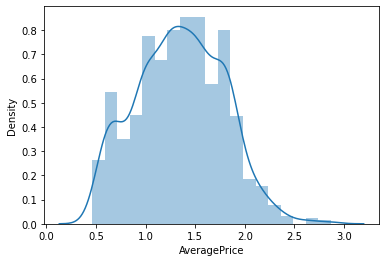

In [139]:
sns.distplot(avocados2['AveragePrice'])

# Not normally distributed, positive skewed

In [140]:
avocados2['AveragePriceSQRT'] = np.sqrt(avocados2['AveragePrice'])

In [141]:
avocados2.head()

,AveragePrice,regionR,AveragePriceSQRT
988,1.04,0,1.019804
989,1.10,0,1.048809
990,1.03,0,1.014889
991,0.92,0,0.959166
992,1.08,0,1.039230


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePriceSQRT', ylabel='Density'>

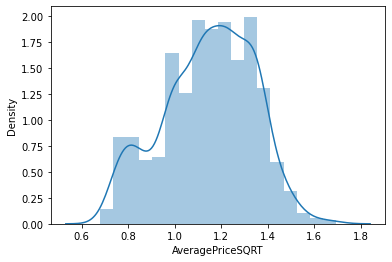

In [142]:
sns.distplot(avocados2['AveragePriceSQRT'])

# Looks way better, but I will try log transformation

In [143]:
avocados2['AveragePriceLOG'] = np.log(avocados2['AveragePrice'])

In [144]:
avocados2.head()

,AveragePrice,regionR,AveragePriceSQRT,AveragePriceLOG
988,1.04,0,1.019804,0.039221
989,1.10,0,1.048809,0.095310
990,1.03,0,1.014889,0.029559
991,0.92,0,0.959166,-0.083382
992,1.08,0,1.039230,0.076961


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePriceLOG', ylabel='Density'>

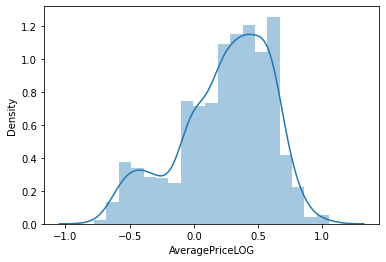

In [145]:
sns.distplot(avocados2['AveragePriceLOG'])

# This is the best transformation I have seen come from the methods attempted, so we will keep this one.

In [146]:
scipy.stats.bartlett(avocados2['AveragePriceLOG'], avocados2['regionR'])

BartlettResult(statistic=621.0783457063926, pvalue=4.357337668804035e-137)

In [151]:
scipy.stats.fligner(avocados2['AveragePriceLOG'], avocados2['AveragePriceLOG'])

FlignerResult(statistic=0.0, pvalue=1.0)

# Does not meet the assumption for homoegeneity of variance. Variance is unequal

In [152]:
avocados2.dropna(inplace=True)

In [153]:
stats.f_oneway(avocados2['AveragePriceLOG'][avocados2['regionR']== 0],
               avocados2['AveragePriceLOG'][avocados2['regionR']== 1],
               avocados2['AveragePriceLOG'][avocados2['regionR']== 2])

F_onewayResult(statistic=58.278958666788625, pvalue=1.1104935402510524e-24)

# This shows that the data is not significant, meaning that there is little or no difference in the average price of avocados in Houston, Albany, and Seattle. We will now move onto Post Hocs

In [154]:
postHoc = MultiComparison(avocados2['AveragePriceLOG'], avocados2['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   0.1252   0.0  0.0639  0.1865   True
     0      2  -0.1564   0.0 -0.2177  -0.095   True
     1      2  -0.2816   0.0 -0.3429 -0.2202   True
---------------------------------------------------


# Examine Means First

In [155]:
avocados2.groupby('regionR').mean()

,AveragePrice,AveragePriceSQRT,AveragePriceLOG
regionR,,,
0,1.313994,1.139689,0.249841
1,1.506213,1.216837,0.375035
2,1.224438,1.077643,0.093470


## The average prices of all proposed regions significantly differed from each other, with Orlando seeming to have the most expensive average price of avocados.